# Duke Breast Cancer Dataset 

This notebook demonstrates the process of loading, analyzing, and visualizing the Duke Breast Cancer Dataset. It includes steps to load the dataset, display statistics for a specific series, and visualize tumor slices using matplotlib. The settings for the dataset are configured using the `settings` object.

In [2]:
import os
import sys

# Add the parent directory to the Python path
sys.path.append(os.path.abspath(os.path.join(os.path.dirname(os.path.abspath("__file__")), '..')))

import matplotlib.pyplot as plt

from datasets import DukeDataset
from settings import Settings

%matplotlib inline

settings = Settings()

### Dataset loading 

This cell initializes the `DukeDataset` object using the dataset directory and input size specified in the `settings` object.

In [3]:
dataset = DukeDataset(settings.DATASET_DIR, crop_size=settings.INPUT_SIZE)

### Data statistics 

The code below displays the number of cases/series in the dataset, selects a specific series, and prints detailed information about that series, including its phenotype, the number of tumor slices, and a list of those slices. It also processes the selected series and prints the shape of the resulting volume after pre-processing.

In [4]:
print("\nCases/Series: %d" % len(list(dataset.volumes.keys())))
key = list(dataset.volumes.keys())[168]
print("\nExample:\n\nCase/Series: %s" % key)
print("Phenotype: %s => %s" % (
    dataset.volumes[key]["phenotype"], settings.PHENOTYPES[dataset.volumes[key]["phenotype"]]))
print("Number of tumor slices: %d" % len(dataset.volumes[key]["slices"]))
print("List of slices:")
for i in range(len(dataset.volumes[key]["slices"])):
    slice = dataset.volumes[key]["slices"][i]
    print(f"\t{slice}")
volume = dataset.process_scan(key)
print(f"\nVolume shape (after pre-processing): {volume.shape}")


Cases/Series: 3300

Example:

Case/Series: Breast_MRI_800._series#502.000000-Ph2ax 3d dyn-53091#_
Phenotype: 0 => Luminal_A
Number of tumor slices: 15
List of slices:
	/data/mguevaral/crop_bbox/id#Breast_MRI_800#_series#502.000000-Ph2ax 3d dyn-53091#_slice#072#.jpg
	/data/mguevaral/crop_bbox/id#Breast_MRI_800#_series#502.000000-Ph2ax 3d dyn-53091#_slice#073#.jpg
	/data/mguevaral/crop_bbox/id#Breast_MRI_800#_series#502.000000-Ph2ax 3d dyn-53091#_slice#074#.jpg
	/data/mguevaral/crop_bbox/id#Breast_MRI_800#_series#502.000000-Ph2ax 3d dyn-53091#_slice#075#.jpg
	/data/mguevaral/crop_bbox/id#Breast_MRI_800#_series#502.000000-Ph2ax 3d dyn-53091#_slice#076#.jpg
	/data/mguevaral/crop_bbox/id#Breast_MRI_800#_series#502.000000-Ph2ax 3d dyn-53091#_slice#077#.jpg
	/data/mguevaral/crop_bbox/id#Breast_MRI_800#_series#502.000000-Ph2ax 3d dyn-53091#_slice#078#.jpg
	/data/mguevaral/crop_bbox/id#Breast_MRI_800#_series#502.000000-Ph2ax 3d dyn-53091#_slice#079#.jpg
	/data/mguevaral/crop_bbox/id#Breast_MRI

### Tumour visualization 

The code below creates a figure with six subplots, each displaying a different slice of the tumor volume. The slices are selected at specific intervals to provide a comprehensive view of the tumor's structure. The figure's title indicates the tumor's phenotype, and each subplot is labeled with the corresponding slice number.

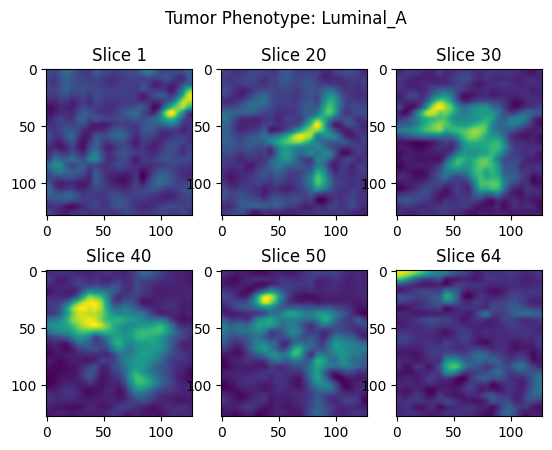

In [ ]:
fig = plt.figure()
fig.suptitle("Tumor Phenotype: {}".format(
    settings.PHENOTYPES[dataset.volumes[key]["phenotype"]]))
ax = plt.subplot(2, 3, 1)

for i, slice_num in enumerate([0, 19, 29, 39, 49, 63], start=1):
    ax = plt.subplot(2, 3, i)
    ax.title.set_text(f'Slice {slice_num + 1}')
    plt.imshow(volume[slice_num, :, :].T)
    
plt.show() 